4) Uma empresa trabalha com injeção de peças plásticas. Eles possuem um pátio de 
equipamentos com vários tipos de injetoras diferentes (injetoras Romi, Sandretto, etc.). Alguns 
modelos possuem mais de uma injetora.  
O coordenador de manutenção, então, inicia um projeto que visa reduzir o tempo de máquina 
parada. Um contrato de melhoria é firmado com o objetivo de: Reduzir em 30% a quantidade 
de horas de máquina parada nas injetoras em 3 meses. 
Sem uma estratégia inicial, o coordenador então vai até o sistema de dados e coleta 
informações. Essas informações são registradas em dois sistemas diferentes: 
Sistema I: Na planilha Green_Belt_FM2S_Lista_Exercícios_01, na aba 04a.Manutenção estão os 
dados de horas paradas totais, por injetora e por mês, onde são contabilizadas as horas paradas, 
classificadas  em  problemas  elétricos,  mecânicos  e  de  molde.  Essa  planilha  é  preenchida  pelo 
pessoal de produção. 
Sistema  II:  Na  planilha  Green_Belt_FM2S_Lista_Exercícios_01,  na  aba  04b.Manutenção,  está 
uma compilação dos apontamentos manuais sobre cada parada, feita pelo pessoal de 
manutenção. 
Analise os dados e responda: 


1. Qual é a injetora mais problemática? 
2. Qual é o problema mais usual? 
3. O processo está atuando em causas comuns ou especiais? 
4. Qual seria uma possível explicação para as causas especiais (se aplicável?) 
5. Qual ideia de mudança o coordenador poderia ter analisando estes dados?

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
url = 'https://raw.githubusercontent.com/moises-rb/Analise_Dados/refs/heads/main/Green_Belt/2-Measure/Exercicios/Lista_1/base_dados/manutencao.csv'
df = pd.read_csv(url)
df.head()

,Máquina,Descrição,Parada,Unnamed: 3,Tipo,Tempo,Mês
0,1-INJ-001,Romi 1100,Aspirador de Material,Interno,Elétrico,13,1
1,1-INJ-001,Romi 1100,Padronização CCQ,NaN,Elétrico,"200,75",2
2,1-INJ-001,Romi 1100,Queda de Energia,NaN,Elétrico,"1,58",2
3,1-INJ-001,Romi 1100,Resistência do Canhão,Interno,Elétrico,5,2
4,1-INJ-001,Romi 1100,Padronização do novo sistema de Refrigeração,Interno,Molde,81,2


In [4]:
# Convertendo valores decimais (substituindo vírgula por ponto)
df['Tempo'] = df['Tempo'].astype(str).str.replace(',', '.').astype(float)

# Criando coluna de 'Máquina Simplificada' para análise
df['Máquina Simplificada'] = df['Máquina'].str.extract(r'(1-INJ-\d+)')[0]

<function matplotlib.pyplot.show(close=None, block=None)>

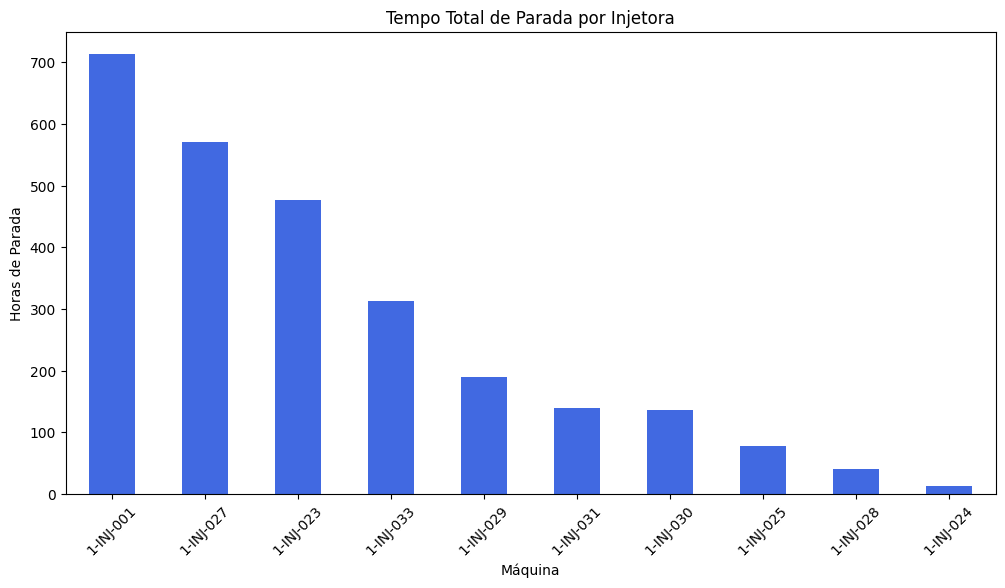

In [5]:
# Tempo total de parada por máquina
paradas_por_maquina = df.groupby('Máquina Simplificada')['Tempo'].sum().sort_values(ascending=False)

plt.figure(figsize=(12,6))
paradas_por_maquina.plot(kind='bar', color='royalblue')
plt.title('Tempo Total de Parada por Injetora')
plt.ylabel('Horas de Parada')
plt.xlabel('Máquina')
plt.xticks(rotation=45)
plt.show

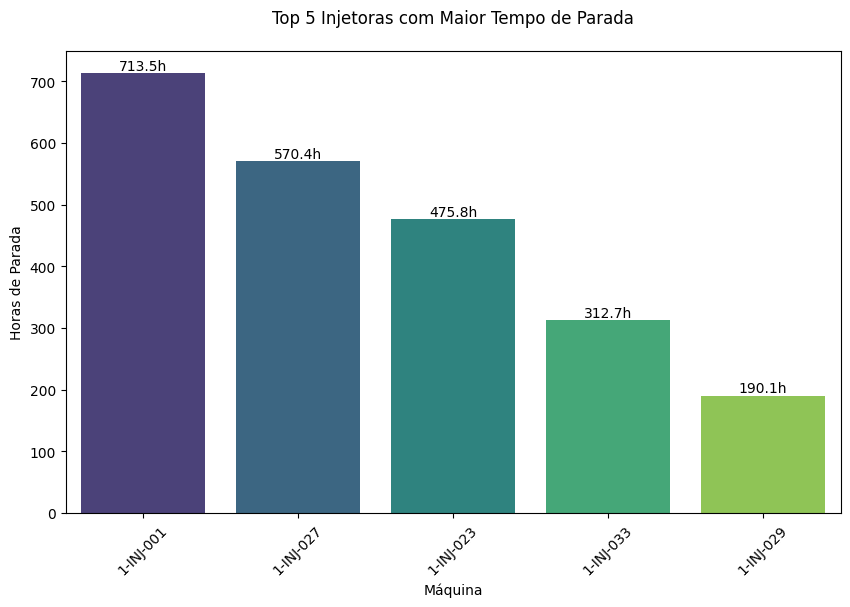

In [6]:
top_5_maquinas = df.groupby('Máquina Simplificada')['Tempo'].sum().nlargest(5)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_5_maquinas.index, y=top_5_maquinas.values, palette='viridis', hue=top_5_maquinas.index)
plt.title('Top 5 Injetoras com Maior Tempo de Parada', pad=20)
plt.xlabel('Máquina')
plt.ylabel('Horas de Parada')
plt.xticks(rotation=45)
for i, v in enumerate(top_5_maquinas.values):
    plt.text(i, v+5, f"{v:.1f}h", ha='center')
plt.show()

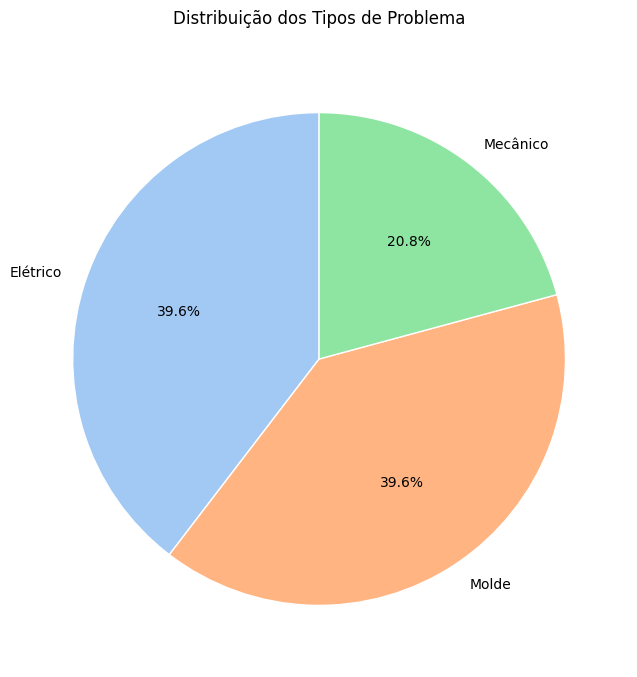

In [7]:
problema_dist = df['Tipo'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(problema_dist, 
        labels=problema_dist.index, 
        autopct='%1.1f%%',
        startangle=90,
        colors=sns.color_palette('pastel'),
        wedgeprops={'linewidth': 1, 'edgecolor': 'white'})
plt.title('Distribuição dos Tipos de Problema', pad=20)
plt.show()

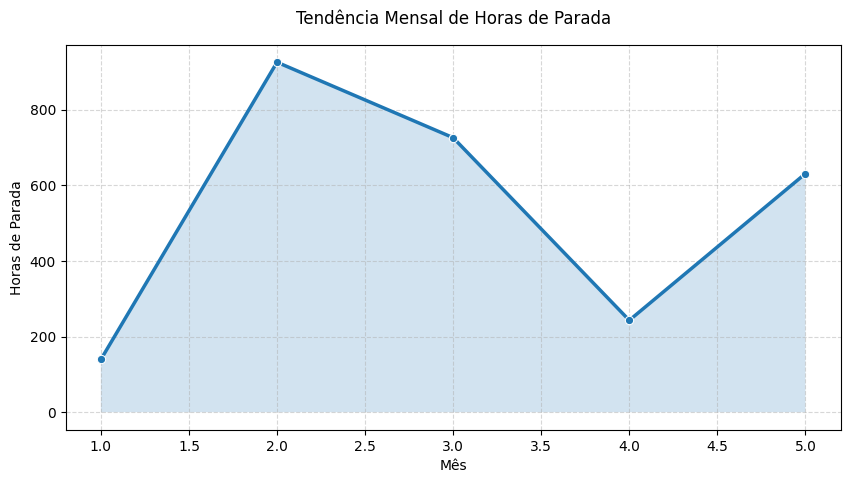

In [8]:
mensal = df.groupby('Mês')['Tempo'].sum()

plt.figure(figsize=(10, 5))
sns.lineplot(data=mensal, marker='o', linewidth=2.5)
plt.fill_between(mensal.index, mensal.values, alpha=0.2)
plt.title('Tendência Mensal de Horas de Parada', pad=15)
plt.xlabel('Mês')
plt.ylabel('Horas de Parada')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

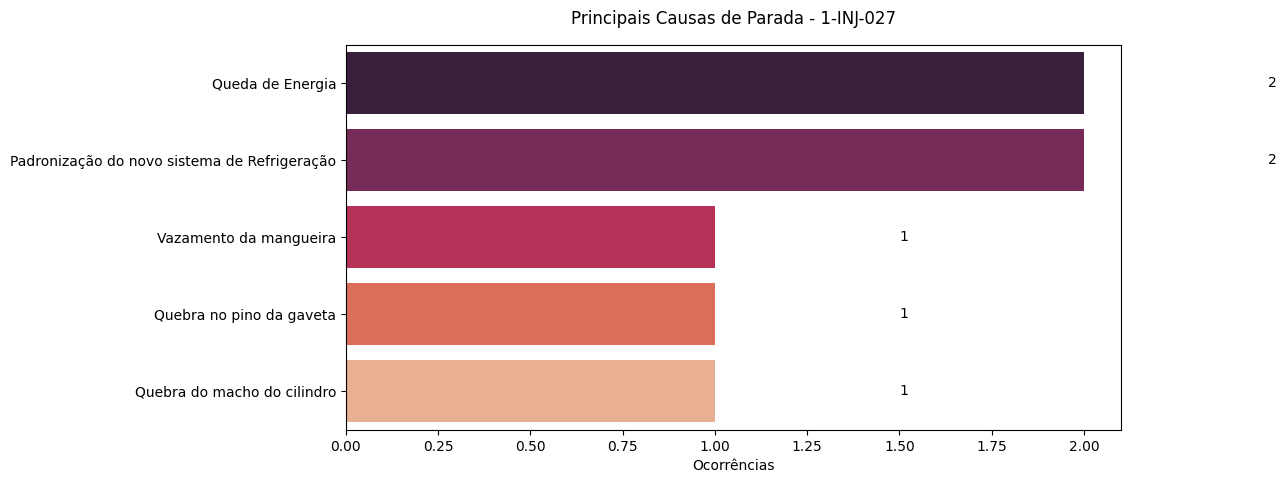

In [10]:
maquina_problematica = df[df['Máquina Simplificada'] == '1-INJ-027']

# Top 5 problemas específicos
top_problemas = maquina_problematica['Parada'].value_counts().head(5)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_problemas.values, y=top_problemas.index, palette='rocket', hue=top_problemas.index)
plt.title('Principais Causas de Parada - 1-INJ-027', pad=15)
plt.xlabel('Ocorrências')
plt.ylabel('')
for i, v in enumerate(top_problemas.values):
    plt.text(v+0.5, i, str(v), va='center')
plt.show()